# Cross validation

In [1]:
import h5py
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# regression
f = h5py.File("../data/regression_data.hdf5", "r")
X = np.array(f["X"])
Y = np.array(f["Y"])
f.close()

## Regression

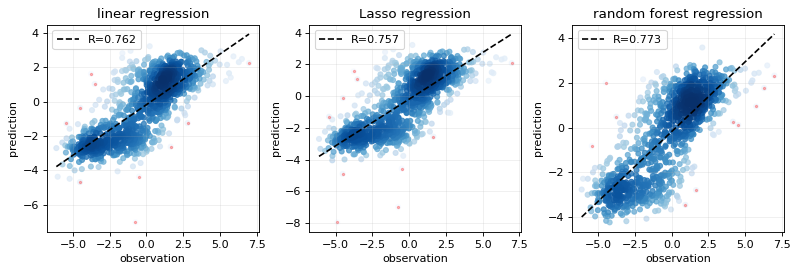

In [2]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from hilearn import CrossValidation, corr_plot

# define the model objects
linreg = linear_model.LinearRegression()
lassoreg = linear_model.LassoCV(cv=3)
randforest = RandomForestRegressor(n_estimators=100, n_jobs=-1)

fig = plt.figure(figsize=(10, 3.5), dpi=80)
plt.subplot(1,3,1)
# Cross-Validation wrap & corr_plot
CV = CrossValidation(X,Y)
Y_pre = CV.cv_regression(linreg)
corr_plot(Y, Y_pre, size=20)

plt.xlabel("observation")
plt.ylabel("prediction")
plt.title("linear regression")
plt.grid(alpha=0.2)
# pl.ylim(-6,4)

plt.subplot(1,3,2)
CV = CrossValidation(X,Y)
Y_pre = CV.cv_regression(lassoreg)
corr_plot(Y, Y_pre, size=20)
plt.xlabel("observation")
plt.ylabel("prediction")
plt.title("Lasso regression")
plt.grid(alpha=0.2)
# pl.ylim(-6,4)

plt.subplot(1,3,3)
CV = CrossValidation(X,Y)
Y_pre = CV.cv_regression(randforest)
corr_plot(Y, Y_pre, size=20)
plt.xlabel("observation")
plt.ylabel("prediction")
plt.title("random forest regression")
plt.grid(alpha=0.2)
# pl.ylim(-6,4)

plt.tight_layout()
# fig.savefig("cv_regression.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Classification

In [3]:
# classification
# making pseudo-label by stratifying y values

idx = (Y < -0.5) + (Y > 0.5)
X1 = X[idx,:]
Y1 = (Y[idx] > 0.5).astype("int")

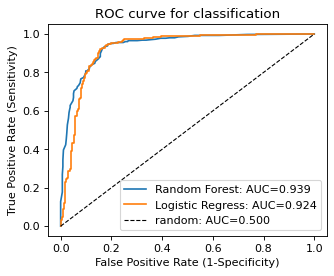

In [4]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from hilearn import ROC_plot, CrossValidation

LogisticRegression = linear_model.LogisticRegression(solver='lbfgs')
RF_class = RandomForestClassifier(n_estimators=100, n_jobs=-1)

CV = CrossValidation(X1, Y1)
Y1_pre, Y1_score = CV.cv_classification(model=RF_class, folds=10)
Y2_pre, Y2_score = CV.cv_classification(model=LogisticRegression, folds=10)

fig = plt.figure(figsize=(4.5, 3.5), dpi=80)
ROC_plot(Y1, Y1_score[:,1], legend_label="Random Forest", base_line=False)
ROC_plot(Y1, Y2_score[:,1], legend_label="Logistic Regress")
plt.title("ROC curve for classification")

# fig.savefig("cv_classification.pdf", dpi=300, bbox_inches='tight')
plt.show()